In [1]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 133.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvj

In [3]:
from sentence_transformers import SentenceTransformer
import torch
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
model = SentenceTransformer("sentence-transformers/LaBSE")

def get_labse_embedding(text):
    return model.encode(text, convert_to_numpy=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

In [4]:
df = pd.read_csv("/content/oxford3000_translated.csv", encoding='utf-8')
words = {}
for index, row in df.iterrows():
  en_word = row['en']
  words[en_word] = {"hi": row['hi'], "kn":row['kn'], "fr":row['fr']}
words

{'a': {'hi': 'ए', 'kn': 'ಒಂದು', 'fr': 'un'},
 'abandon': {'hi': 'छोड़ देना', 'kn': 'ಕೈಬಿಡು', 'fr': 'abandonner'},
 'ability': {'hi': 'क्षमता', 'kn': 'ಸಾಮರ್ಥ್ಯ', 'fr': 'capacité'},
 'able': {'hi': 'योग्य', 'kn': 'ಸಮರ್ಥ', 'fr': 'capable'},
 'about': {'hi': 'के बारे में', 'kn': 'ಬಗ್ಗೆ', 'fr': 'à propos'},
 'above': {'hi': 'ऊपर', 'kn': 'ಮೇಲೆ', 'fr': 'au-dessus de'},
 'abroad': {'hi': 'विदेश', 'kn': 'ವಿದೇಶ', 'fr': "à l'étranger"},
 'absolute': {'hi': 'निरपेक्ष', 'kn': 'ಅತ್ಯುತ್ಸಾಹದ', 'fr': 'absolu'},
 'absolutely': {'hi': 'बिल्कुल', 'kn': 'ಸಂಪೂರ್ಣವಾಗಿ', 'fr': 'absolument'},
 'academic': {'hi': 'अकादमिक', 'kn': 'ಶೈಕ್ಷಣಿಕ', 'fr': 'académique'},
 'accept': {'hi': 'स्वीकार करना', 'kn': 'ಒಪ್ಪಿಸು', 'fr': 'accepter'},
 'acceptable': {'hi': 'स्वीकार्य', 'kn': 'ಸ್ವೀಕಾರಾರ್ಹ', 'fr': 'acceptable'},
 'access': {'hi': 'पहुँच', 'kn': 'ಪ್ರವೇಶ', 'fr': 'accéder'},
 'accident': {'hi': 'दुर्घटना', 'kn': 'ಅಪಘಾತ', 'fr': 'accident'},
 'accommodation': {'hi': 'आवास', 'kn': 'ಸೌಕರ್ಯ', 'fr': 'hébergement'},
 'accompan

In [11]:
from tqdm import tqdm

embedding_dict = {
    "en": [],
    "fr": [],
    "hi": [],
    "kn": [],
    "labels": []
}

# templates = {
#     "en": "This is the word: {}",
#     "fr": "Voici le mot : {}",
#     "hi": "यह शब्द है: {}",
#     "kn": "ಇದು ಪದವಾಗಿದೆ: {}"
# }

for en_word, translations in tqdm(words.items(), desc="Generating LaBSE embeddings"):
    embedding_dict["labels"].append(en_word)
    # embedding_dict["en"].append(get_labse_embedding(templates["en"].format(en_word)))
    # embedding_dict["fr"].append(get_labse_embedding(templates["fr"].format(translations["fr"])))
    # embedding_dict["hi"].append(get_labse_embedding(templates["hi"].format(translations["hi"])))
    # embedding_dict["kn"].append(get_labse_embedding(templates["kn"].format(translations["kn"])))
    embedding_dict["en"].append(get_labse_embedding(en_word))
    embedding_dict["fr"].append(get_labse_embedding(translations["fr"]))
    embedding_dict["hi"].append(get_labse_embedding(translations["hi"]))
    embedding_dict["kn"].append(get_labse_embedding(translations["kn"]))


Generating LaBSE embeddings: 100%|██████████| 2830/2830 [02:03<00:00, 22.83it/s]


In [6]:
records = []

for i in range(len(embedding_dict["labels"])):
    word = embedding_dict["labels"][i]
    for lang in ["en", "fr", "hi", "kn"]:
        embedding = embedding_dict[lang][i]

        # Get the word in that language
        if lang == "en":
            translated_word = word
        else:
            translated_word = words[word][lang]

        # Create a record
        record = {
            "word": translated_word,
            "lang": lang
        }
        for j, val in enumerate(embedding):
            record[f"dim_{j}"] = val

        records.append(record)

# Save as DataFrame
df_embed = pd.DataFrame(records)
df_embed.to_csv("word_embeddings_LaBSE.csv", index=False)
print("✅ Embeddings saved to word_embeddings.csv")
df_embed.head()

✅ Embeddings saved to word_embeddings.csv


,word,lang,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,...,dim_758,dim_759,dim_760,dim_761,dim_762,dim_763,dim_764,dim_765,dim_766,dim_767
0,a,en,0.013412,-0.067114,-0.040921,-0.032861,-0.005146,0.059586,-0.036916,-0.007063,...,-0.000346,-0.028669,-0.032780,0.011968,0.008973,-0.001404,0.017441,0.014092,-0.067429,-0.045542
1,un,fr,-0.010954,-0.061937,-0.040177,-0.041081,0.000385,0.048222,-0.037741,0.018822,...,-0.032128,-0.045949,-0.015417,0.011404,0.012660,-0.026149,0.030783,0.043486,-0.070150,-0.039858
2,ए,hi,0.010098,-0.062628,-0.035872,-0.029022,-0.004390,0.060297,-0.046508,-0.009327,...,0.001430,-0.014614,-0.027246,-0.008397,0.008371,-0.019524,0.013381,0.017332,-0.062245,-0.045509
3,ಒಂದು,kn,0.011212,-0.056765,-0.040460,-0.042552,-0.017090,0.056106,-0.035851,0.010101,...,0.014581,-0.040871,-0.020715,0.020305,-0.002856,0.007949,0.025951,0.006977,-0.059174,-0.044780
4,abandon,en,0.019676,-0.062126,0.012156,0.012822,-0.008246,0.038895,-0.024255,-0.007149,...,0.001467,-0.030358,-0.064015,-0.004346,-0.018329,0.002920,-0.008893,0.010460,-0.058857,-0.010600


In [12]:
def compute_pairwise_similarities(embedding_dict, pairs=[("en", "fr"), ("en", "hi"), ("en", "kn"), ("hi", "kn")]):
    pairwise_data = []

    for i, word in enumerate(embedding_dict["labels"]):
        for lang1, lang2 in pairs:
            vec1 = embedding_dict[lang1][i]
            vec2 = embedding_dict[lang2][i]
            sim = cosine_similarity([vec1], [vec2])[0][0]
            pairwise_data.append({
                "Word": word,
                "Language Pair": f"{lang1.upper()}–{lang2.upper()}",
                "Cosine Similarity": sim
            })

    return pairwise_data

In [13]:
similarity_data = compute_pairwise_similarities(embedding_dict)

df_sim = pd.DataFrame(similarity_data)

In [14]:
df_sim

,Word,Language Pair,Cosine Similarity
0,a,EN–FR,0.905030
1,a,EN–HI,0.932257
2,a,EN–KN,0.875763
3,a,HI–KN,0.822349
4,abandon,EN–FR,0.963484
...,...,...,...
11315,zero,HI–KN,0.952478
11316,zone,EN–FR,1.000000
11317,zone,EN–HI,0.895487
11318,zone,EN–KN,0.921397


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


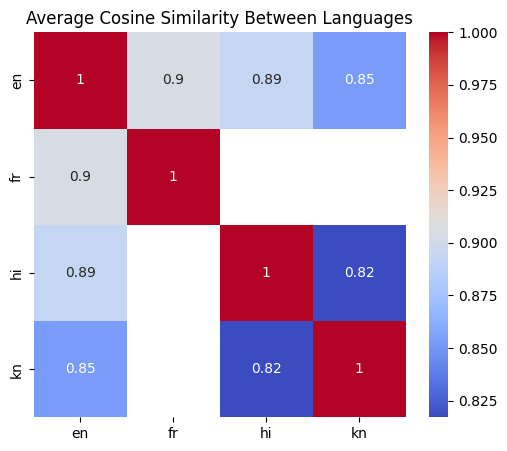

In [15]:
#Heat Map plot
languages = ["en", "fr", "hi", "kn"]
heatmap_data = np.zeros((4, 4))

# Build matrix from pairwise similarities
for i, lang1 in enumerate(languages):
    for j, lang2 in enumerate(languages):
        if lang1 == lang2:
            heatmap_data[i][j] = 1.0
        else:
            sims = df_sim[df_sim["Language Pair"] == f"{lang1.upper()}–{lang2.upper()}"]["Cosine Similarity"].tolist()
            if not sims:
                # Try reverse (e.g., FR–EN instead of EN–FR)
                sims = df_sim[df_sim["Language Pair"] == f"{lang2.upper()}–{lang1.upper()}"]["Cosine Similarity"].tolist()
            heatmap_data[i][j] = np.mean(sims)

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, xticklabels=languages, yticklabels=languages, annot=True, cmap="coolwarm")
plt.title("Average Cosine Similarity Between Languages")
plt.show()

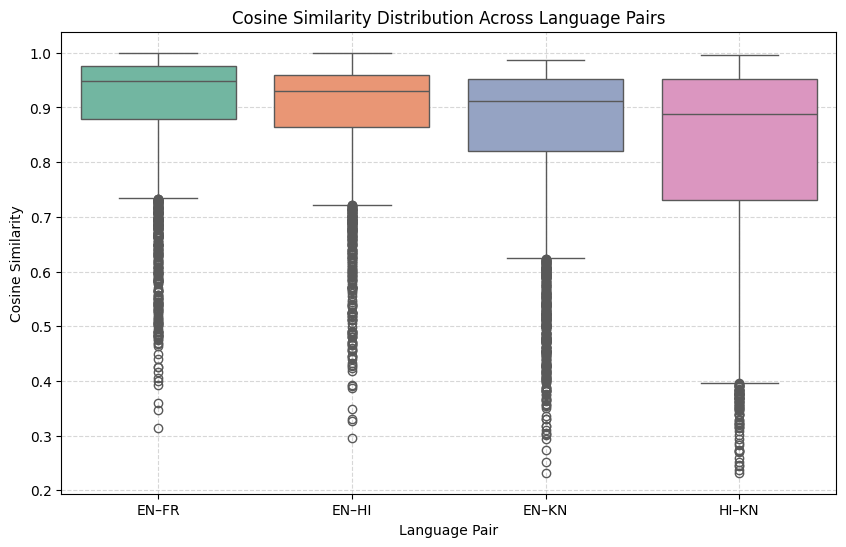

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Language Pair", y="Cosine Similarity", data=df_sim, hue="Language Pair",palette="Set2", legend=False)

plt.title("Cosine Similarity Distribution Across Language Pairs")
plt.ylabel("Cosine Similarity")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

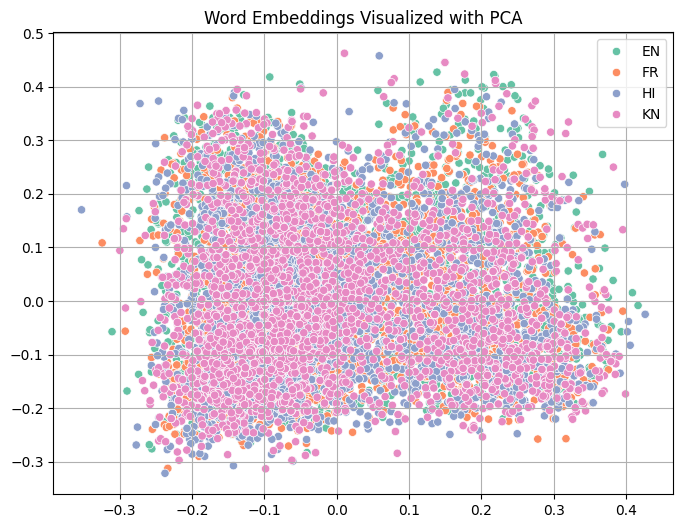

In [17]:
from sklearn.decomposition import PCA

# Combine embeddings from all languages
combined_embeddings = (
    embedding_dict["en"] +
    embedding_dict["fr"] +
    embedding_dict["hi"] +
    embedding_dict["kn"]
)

labels = (
    ["EN"] * len(embedding_dict["en"]) +
    ["FR"] * len(embedding_dict["fr"]) +
    ["HI"] * len(embedding_dict["hi"]) +
    ["KN"] * len(embedding_dict["kn"])
)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(combined_embeddings)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=labels, palette="Set2")
plt.title("Word Embeddings Visualized with PCA")
plt.grid(True)
plt.show()

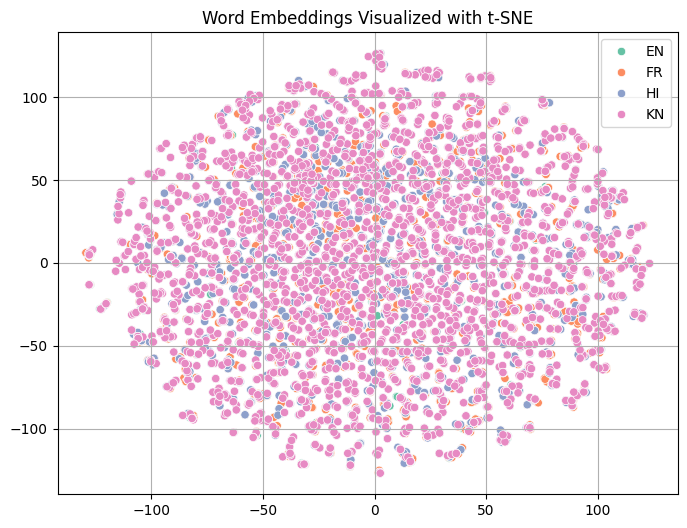

In [18]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=10, random_state=42)
combined_embeddings_np = np.array(combined_embeddings)
tsne_result = tsne.fit_transform(combined_embeddings_np)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=labels, palette="Set2")
plt.title("Word Embeddings Visualized with t-SNE")
plt.grid(True)
plt.show()